# Machine Learning: Introdução a classificação com SKLearn

# Aula 3 - Um projeto de baixa dimensionalidade e baseline

## Testando em duas dimensões

In [1]:
# Importando Pandas, os dados por meio da URI e visualizando o cabeçalho com os dados importados
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# Renomeando as colunas do DataFrame
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# Criando uma nova coluna ['finalizado'], para melhor entendimento dos dados. Os valores devem ser opostos aos valores da 
# coluna ['nao_finalizado']. Para tal, utilizamos novamente um mapa em Python e a função map. Verificando os últimos dados
# para verificar se funcionou (tail)
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


### OBS: Para se referir às colunas de um DataFrame também podemos usar ponto (dados.finalizado = dados['finalizado']), mas não em todas as situações, já que o '.' também é usado para executar métodos

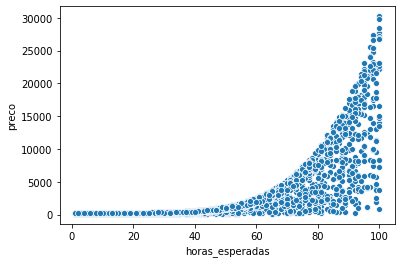

In [4]:
# Com essas duas features, podemos desenhar em um eixo as horas_esperadas e em outro o preco. Para isso, usaremos uma famosa 
# biblioteca do Python chamada Seaborn, para traçar um gráfico de dispersão.
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

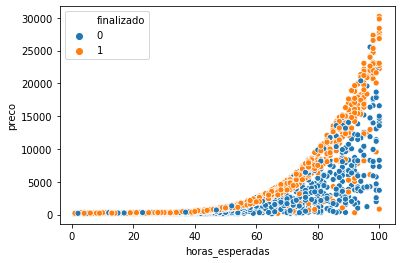

In [5]:
# Utilizaremos a mesma estrutura do método scatterplot, mas dessa vez passando o parâmetro hue, que será baseado na coluna 
# finalizado, pintando os pontos de acordo com a classe atribuída à essa coluna:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

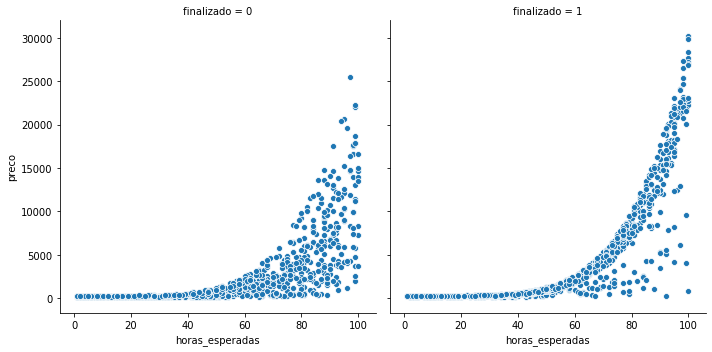

In [6]:
# Uma outra alternativa é realizar uma plotagem relativa por meio de relplot(). Com esse método, ao invés das cores, queremos
# plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

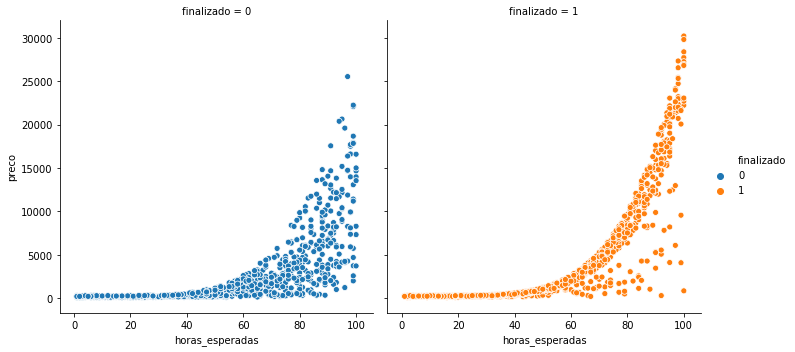

In [7]:
# Também é possível inserir cores em plotagens relativas, adicionando outro recurso visual para a organização dos dados. 
# Para tanto, voltaremos a inserir o parâmetro hueno código: 
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [8]:
# Para realizar a modelagem, selecionamos como x as colunas 'horas_esperadas' e 'preco'; y será a coluna 'finalizado'
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [9]:
# Utilizando a mesma estrutura de algoritmo com estimador linear utilizado na aula 2. Para evitar warnings com respeito ao
# número de iterações, acrescenta-se o parâmetro dual=False em LinearSVC(). Ele costuma acontecer quando o nosso numero de 
# características é menor que o nosso numero de amostras.
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com {} elementos e testaremos com {} elementos".format(len(treino_x), len(teste_x)))

modelo = LinearSVC(dual=False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi {:.2f}%".format(acuracia))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.44%


In [10]:
# Para obtermos uma resposta satisfatória, precisamos de um recurso comparativo. Com o Numpy, a biblioteca que gera matrizes,
# faremos com que 540 elementos tenham o valor 1. Este será o nosso baseline, o modelo de comparação para acurácia.
import numpy as np
baseline = np.ones(540)
acuracia = accuracy_score(teste_y, baseline) * 100
print("A acurácia do baseline somente com '1's foi de {:.2f}%".format(acuracia))

A acurácia do baseline somente com '1's foi de 52.59%


### Ou seja, é necessário investigar o porque do desempenho tão baixo 

## Curva de decisão

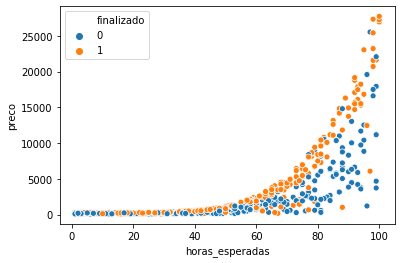

In [11]:
# Agora iremos analisar cada uma das classificações que realizamos. Para isso, copiaremos o mesmo código de scatterplot() que
# utilizamos anteriormente, mas, ao invés de dados, usaremos teste_x. Também precisaremos alterar o campo que serve de 
# parâmetro para hue - no caso, teste_y. 
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [12]:
# Repare que, aparentemente, estamos seguindo o mesmo padrão de treino e teste. Como estamos em um caso bastante específico,
# iremos abordá-las apenas com duas dimensões, já que nos ajudarão a compreender com clareza qual é o problema do nosso 
# algoritmo. Do conjunto teste_x, coletaremos o valor mínimo (min()) para horas_esperadas, e atribuiremos o nome 
# x_min a esse valor. Faremos um procedimento similar para x_max, mas dessa vez coletando o valor máximo. Repetiremos essa 
# estrutura para teste_y, mas agora trabalhando com preco mínimo e máximo. Por fim, imprimiremos o resultado.
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [13]:
# O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se 
# multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o 
# que é o suficiente. Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels 
# ((x_max - x_min)/pixels.
# Por fim, adicionaremos o método arange() da biblioteca do Numpy.
pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [14]:
# Faremos o mesmo procedimento para o eixo_y, aproveitando para nomear cada uma dessas operações:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
eixo_y

array([  101.  ,   377.37,   653.74,   930.11,  1206.48,  1482.85,
        1759.22,  2035.59,  2311.96,  2588.33,  2864.7 ,  3141.07,
        3417.44,  3693.81,  3970.18,  4246.55,  4522.92,  4799.29,
        5075.66,  5352.03,  5628.4 ,  5904.77,  6181.14,  6457.51,
        6733.88,  7010.25,  7286.62,  7562.99,  7839.36,  8115.73,
        8392.1 ,  8668.47,  8944.84,  9221.21,  9497.58,  9773.95,
       10050.32, 10326.69, 10603.06, 10879.43, 11155.8 , 11432.17,
       11708.54, 11984.91, 12261.28, 12537.65, 12814.02, 13090.39,
       13366.76, 13643.13, 13919.5 , 14195.87, 14472.24, 14748.61,
       15024.98, 15301.35, 15577.72, 15854.09, 16130.46, 16406.83,
       16683.2 , 16959.57, 17235.94, 17512.31, 17788.68, 18065.05,
       18341.42, 18617.79, 18894.16, 19170.53, 19446.9 , 19723.27,
       19999.64, 20276.01, 20552.38, 20828.75, 21105.12, 21381.49,
       21657.86, 21934.23, 22210.6 , 22486.97, 22763.34, 23039.71,
       23316.08, 23592.45, 23868.82, 24145.19, 24421.56, 24697

In [15]:
eixo_y

array([  101.  ,   377.37,   653.74,   930.11,  1206.48,  1482.85,
        1759.22,  2035.59,  2311.96,  2588.33,  2864.7 ,  3141.07,
        3417.44,  3693.81,  3970.18,  4246.55,  4522.92,  4799.29,
        5075.66,  5352.03,  5628.4 ,  5904.77,  6181.14,  6457.51,
        6733.88,  7010.25,  7286.62,  7562.99,  7839.36,  8115.73,
        8392.1 ,  8668.47,  8944.84,  9221.21,  9497.58,  9773.95,
       10050.32, 10326.69, 10603.06, 10879.43, 11155.8 , 11432.17,
       11708.54, 11984.91, 12261.28, 12537.65, 12814.02, 13090.39,
       13366.76, 13643.13, 13919.5 , 14195.87, 14472.24, 14748.61,
       15024.98, 15301.35, 15577.72, 15854.09, 16130.46, 16406.83,
       16683.2 , 16959.57, 17235.94, 17512.31, 17788.68, 18065.05,
       18341.42, 18617.79, 18894.16, 19170.53, 19446.9 , 19723.27,
       19999.64, 20276.01, 20552.38, 20828.75, 21105.12, 21381.49,
       21657.86, 21934.23, 22210.6 , 22486.97, 22763.34, 23039.71,
       23316.08, 23592.45, 23868.82, 24145.19, 24421.56, 24697

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [17]:
yy

array([[  101.  ,   101.  ,   101.  , ...,   101.  ,   101.  ,   101.  ],
       [  377.37,   377.37,   377.37, ...,   377.37,   377.37,   377.37],
       [  653.74,   653.74,   653.74, ...,   653.74,   653.74,   653.74],
       ...,
       [26908.89, 26908.89, 26908.89, ..., 26908.89, 26908.89, 26908.89],
       [27185.26, 27185.26, 27185.26, ..., 27185.26, 27185.26, 27185.26],
       [27461.63, 27461.63, 27461.63, ..., 27461.63, 27461.63, 27461.63]])

In [18]:
# Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, 
# ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o xx.ravel(): 
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [19]:
yy.ravel()

array([  101.  ,   101.  ,   101.  , ..., 27461.63, 27461.63, 27461.63])

In [20]:
# Concatenando xx.ravel() e yy.ravel() com funções do Numpy(.c_)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [21]:
# Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. Como resultado, teremos
# uma série de números, que são as classificações. Chamaremos essas classificações de Z.
Z = modelo.predict(pontos)
Z.shape
xx.shape
yy.shape

(100, 100)

In [22]:
# Precisamos redimensionar Z para uma matrix 100x100 como xx ou yy
Z=Z.reshape(xx.shape)
Z.shape

(100, 100)

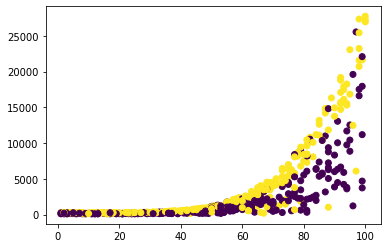

In [23]:
# Agora podemos plotar um gráfico do nosso modelo para todos esses pontos. Para isso, vamos usar o Matplotlib para ajustes
# mais finos do gráfico, também com um gráfico de dispersão.
import matplotlib.pyplot as plt

plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y)

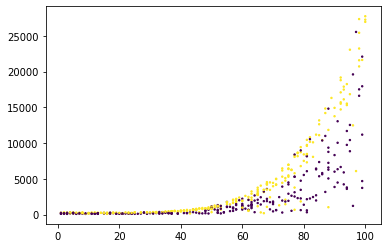

In [24]:
# Diminuindo o tamanho dos pontos para melhorar visualização
plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y, s=2)

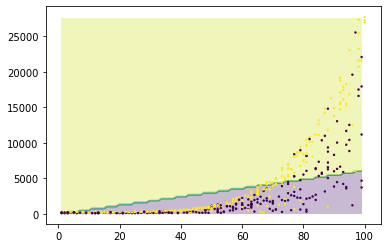

In [25]:
# Usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, 
# escreveremos alpha=0.3, aumentando a transparência.
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

### OBS: Perceba que a curva de decisão do algoritmo quase não é visível, o que quer dizer que os palpites para a finalização do projeto estão enviesados. Precisamos de um melhor estimador, para uma modelagem não linear, assunto que será abordado na próxima aula.

In [26]:
# Salvando os dados tratados para serem importados no notebook da Aula 4
dados.to_csv('dados/intro_ML_webdev_data.csv', index=False)